# Plotting graphs using many SNe

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sncosmo
from bayesn import SEDmodel
import os
import pandas as pd
import math

## Generate a list of all SNe we have a file for

In [21]:
directory = os.fsencode("/root/partiiiproject/Archive")
supernovae_names = ["sn2006hb"]
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".dat"): 
        supernovae_names.append(filename[:-4])
        continue
    else:
        continue

## Load Model

In [ ]:
filter_yaml = "/root/partiiiproject/bayesn-filters/bayesn-filters/filters.yaml"
model = SEDmodel(load_model='W22_model', filter_yaml = filter_yaml)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Current devices: [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]
Currently working in /root/partiiiproject
Loading built-in model W22_model


## Plotting redshift and distance

In [ ]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        a=1
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         a=1

plt.xlabel('redshift')
plt.ylabel('mu')
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distanceredshiftG23vsF99"+".png", bbox_inches='tight') 
plt.show()

## Plotting a graph of Rv and Av Values

In [ ]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')

    if supernova_name == "sn2002cv":
        continue
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV, RV, 'gx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        a=1
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV, RV, 'bx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         a=1

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV, RV, 'rx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         a=1

plt.xlabel(f'$A_V$',fontsize = 20)
plt.ylabel(f'$R_V$',fontsize = 20)
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
green_patch = mpatches.Patch(color='green', label='F99')
plt.legend(handles=[red_patch, blue_patch, green_patch],fontsize = 15)
plt.title(f"Relationship between $R_V$ and $A_V$ for F99, F19 and G23", fontsize = 15)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/RvAvAllSNe.png", bbox_inches='tight')
plt.show()

## Difference in Rv as a function of Av

In [ ]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')

    if supernova_name == "sn2002cv":
        continue
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_F99 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV_F99 = samplesSummary.loc['AV[0]', 'mean']
        #plt.plot(AV, RV, 'gx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_G23 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV_F99, RV_G23-RV_F99, 'bx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_F19 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV_F99, RV_F19-RV_F99, 'rx', label=dust_law)
        plt.plot([AV_F99, AV_F99], [RV_F19-RV_F99, RV_G23-RV_F99], 'k--')
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue

plt.xlabel(f'$A_V$ for F99',fontsize = 20)
plt.ylabel(f'$\Delta$ $R_V$',fontsize = 20)
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
green_patch = mpatches.Patch(color='green', label='F99')

plt.plot([-0.2,2.5], [0,0], 'c--')
plt.legend(handles=[red_patch, blue_patch],fontsize = 15)
plt.title(f"Relationship between $R_V$ and $A_V$ relative to F99",fontsize = 15)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/RvAvAllSNeRelative.png", bbox_inches='tight')
plt.show()

## Difference in mu values - Learned nothing!

In [ ]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu1 = samplesSummary.loc['mu[0]', 'mean']
        mu1_std = samplesSummary.loc['mu[0]', 'sd']
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu2 = samplesSummary.loc['mu[0]', 'mean']
        mu2_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu1-mu2, mu2_std+mu1_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue
        
plt.xlabel('redshift')
plt.ylabel('difference in mu')
#plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distanceredshiftdifferenceG23vsF99"+".png", bbox_inches='tight') 
plt.show()

## Difference of mu - with colour coding for Av values

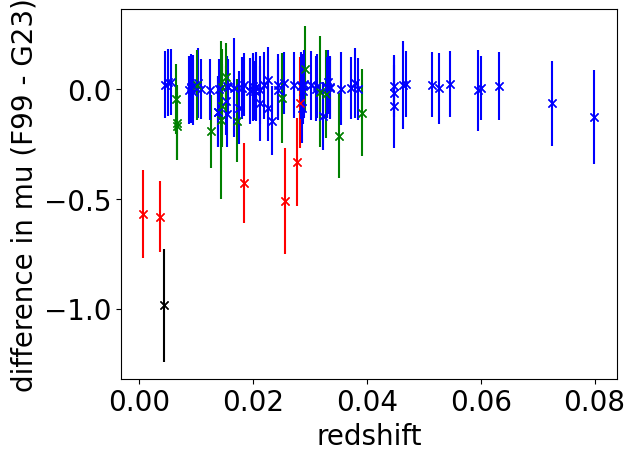

In [22]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu1 = samplesSummary.loc['mu[0]', 'mean']
        mu1_std = samplesSummary.loc['mu[0]', 'sd']
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu2 = samplesSummary.loc['mu[0]', 'mean']
        mu2_std = samplesSummary.loc['mu[0]', 'sd']
        AV2 = samplesSummary.loc['AV[0]', 'mean']
        if 0<=AV2<=0.5:
            color = 'b'
        elif 0.5<=AV2<=1:
            color = 'g'
        elif 1<=AV2<=2:
            color = 'r'
        else:
            color = 'k'
        plt.errorbar(z, mu1-mu2, math.sqrt(mu2_std**2+mu1_std**2), fmt=f'{color}x', label=dust_law)
        plt.plot(z, mu1-mu2, f'{color}x', label=dust_law)
    except FileNotFoundError:
         continue

plt.xlabel('redshift')
plt.ylabel('difference in mu (F99 - G23)')
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distanceredshiftdifferenceG23vsF99color"+".png", bbox_inches='tight') 
plt.show()

## Difference in mu against AV values for F99 law

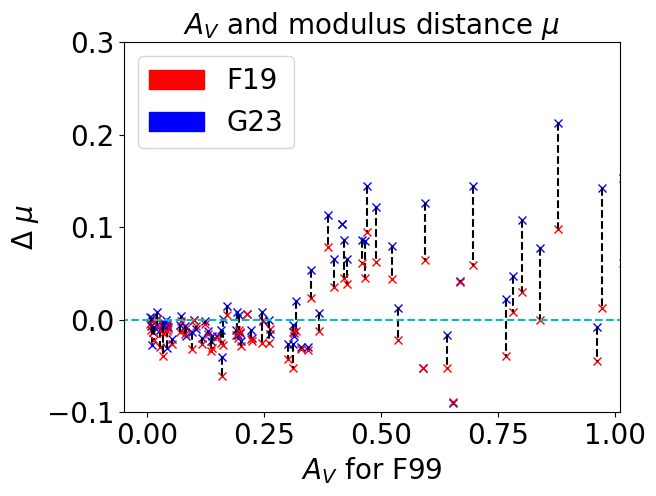

In [40]:
SN_with_AV = pd.DataFrame(columns = ["SNe names", "AV in F99"])

for supernova_name_index, supernova_name in enumerate(supernovae_names):
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu1 = samplesSummary.loc['mu[0]', 'mean']
        mu1_std = samplesSummary.loc['mu[0]', 'sd']
        AV1 = samplesSummary.loc['AV[0]', 'mean']

        #SN with AV in F99
        SN_with_AV.at[supernova_name_index, "SNe names"] = supernova_name
        SN_with_AV.at[supernova_name_index, "AV in F99"] = AV1
    
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu2 = samplesSummary.loc['mu[0]', 'mean']
        mu2_std = samplesSummary.loc['mu[0]', 'sd']
        #plt.errorbar(AV2, mu1-mu2, math.sqrt(mu2_std**2+mu1_std**2), fmt=f'{color}x', label=dust_law)
        plt.plot(AV1, mu2-mu1, f'bx', label=dust_law)
    except FileNotFoundError:
         continue

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu3 = samplesSummary.loc['mu[0]', 'mean']
        mu3_std = samplesSummary.loc['mu[0]', 'sd']
        plt.plot(AV1, mu3-mu1, f'rx', label=dust_law)
        plt.plot([AV1, AV1], [mu2-mu1, mu3-mu1], 'k--')
    except FileNotFoundError:
         continue

plt.xlabel(f'$A_V$ for F99',fontsize = 20)
plt.ylabel(f'$\Delta$ $\mu$',fontsize = 20)
plt.plot([-0.2,9], [0,0], 'c--')
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
plt.legend(handles=[red_patch, blue_patch],fontsize = 20)
plt.xlim(-0.05,1.01)
plt.ylim(-0.1,0.3)
plt.title(f'$A_V$ and modulus distance $\mu$',fontsize = 20)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distancedifferencesWithAVG23vsF99colorZoomed"+".png", bbox_inches='tight') 
plt.show()

## List of SNe ordered by Av in F99

In [ ]:
print(SN_with_AV.sort_values("AV in F99"))

## Plotting redshift against Av

In [ ]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        a=1
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         a=1

    dust_law = "F19"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'rx', label=dust_law)
    except FileNotFoundError:
        a=1

plt.xlabel('redshift')
plt.ylabel('mu')
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distanceredshiftG23vsF99"+".png", bbox_inches='tight') 
plt.show()

## Version with Std

In [ ]:
SN_with_AV = pd.DataFrame(columns = ["SNe names", "AV in F99"])

for supernova_name_index, supernova_name in enumerate(supernovae_names):
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu1 = samplesSummary.loc['mu[0]', 'mean']
        mu1_std = samplesSummary.loc['mu[0]', 'sd']
        AV1 = samplesSummary.loc['AV[0]', 'mean']

        #SN with AV in F99
        SN_with_AV.at[supernova_name_index, "SNe names"] = supernova_name
        SN_with_AV.at[supernova_name_index, "AV in F99"] = AV1
    
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu2 = samplesSummary.loc['mu[0]', 'mean']
        mu2_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(AV1, mu1-mu2, math.sqrt(mu2_std**2+mu1_std**2), fmt=f'bx', label=dust_law)
        #plt.plot(AV1, mu1-mu2, f'bx', label=dust_law)
    except FileNotFoundError:
         continue

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu3 = samplesSummary.loc['mu[0]', 'mean']
        mu3_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(AV1, mu1-mu3, math.sqrt(mu3_std**2+mu1_std**2), fmt=f'rx', label=dust_law)
        #plt.plot(AV1, mu1-mu3, f'rx', label=dust_law)
        plt.plot([AV1, AV1], [mu1-mu2, mu1-mu3], 'k--')
    except FileNotFoundError:
         continue

plt.xlabel(f'$A_V$ for F99',fontsize = 20)
plt.ylabel(f'$\Delta$ $\mu$',fontsize = 20)
plt.plot([-0.2,9], [0,0], 'c--')
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
plt.legend(handles=[red_patch, blue_patch],fontsize = 20)
plt.xlim(-0.1,3)
plt.ylim(-0.7,0.1)
plt.title(f'$A_V$ and modulus distance $\mu$',fontsize = 20)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distancedifferencesWithAVG23vsF99colorWithStd"+".png", bbox_inches='tight') 
plt.show()

## Standard deviation in Rv and Av

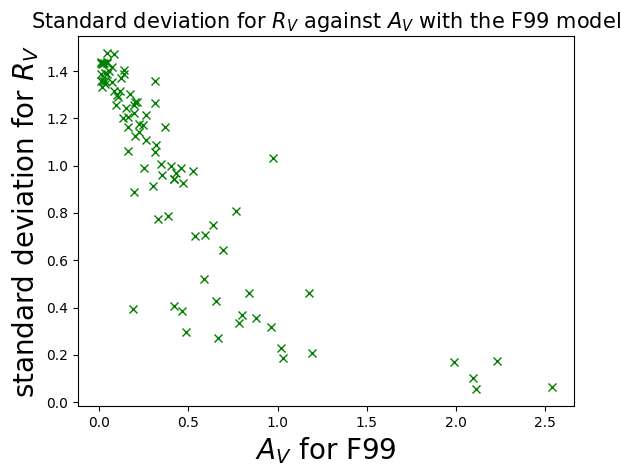

In [9]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')

    if supernova_name == "sn2002cv":
        continue
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_F99 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV_F99 = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV_F99, RV_std, 'gx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_G23 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        #plt.plot(AV_F99, RV_G23-RV_F99, 'bx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_F19 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        #plt.plot(AV_F99, RV_F19-RV_F99, 'rx', label=dust_law)
        #plt.plot([AV_F99, AV_F99], [RV_F19-RV_F99, RV_G23-RV_F99], 'k--')
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue

plt.xlabel(f'$A_V$ for F99',fontsize = 20)
plt.ylabel(f'standard deviation for $R_V$',fontsize = 20)
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
green_patch = mpatches.Patch(color='green', label='F99')

#plt.plot([-0.2,2.5], [0,0], 'c--')
#plt.legend(handles=[red_patch, blue_patch],fontsize = 15)
plt.title(f"Standard deviation for $R_V$ against $A_V$ with the F99 model",fontsize = 15)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/RvStdF99", bbox_inches='tight')
plt.show()

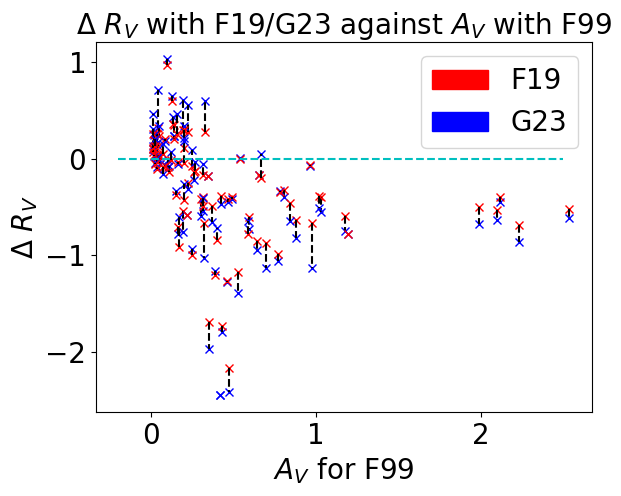

In [18]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')

    if supernova_name == "sn2002cv":
        continue
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_F99 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV_F99 = samplesSummary.loc['AV[0]', 'mean']
        #plt.plot(AV_F99, RV_std, 'gx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_G23 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV_F99, RV_G23-RV_F99, 'bx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV_F19 = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV_F99, RV_F19-RV_F99, 'rx', label=dust_law)
        plt.plot([AV_F99, AV_F99], [RV_F19-RV_F99, RV_G23-RV_F99], 'k--')
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue

plt.rcParams.update({'font.size': 20})
plt.xlabel(f'$A_V$ for F99',fontsize = 20)
plt.ylabel(f'$\Delta$ $R_V$',fontsize = 20)
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
green_patch = mpatches.Patch(color='green', label='F99')

plt.plot([-0.2,2.5], [0,0], 'c--')
plt.legend(handles=[red_patch, blue_patch],fontsize = 20)
plt.title(f"$\Delta$ $R_V$ with F19/G23 against $A_V$ with F99",fontsize = 20)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/RvAvAllSNeRelative.png", bbox_inches='tight')
plt.show()